In [114]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [115]:
import datetime

In [116]:
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.express as px

In [117]:
#general파일 불러온다
df1=pd.read_csv('data/general_dollar.csv',engine='python')
df1.head()

,chid,url,scrape_date,title,created_date,funds_raised,funds_target,picture,org_picture,counts_status_code,...,total_unique_donors,amount_raised_unattributed,number_of_donations_unattributed,campaign_hearts,social_share_total,num_recent_donations,recent_time_window,funds_raised_dollar,funds_target_dollar,amount_raised_unattributed_dollar
0,1,https://www.gofundme.com/f/-chris-beaty-memori...,2020-11-03 19:39:00-05:00,Chris Beaty Memorial Fund,2020-06-03,175083.0,200000.0,True,False,200,...,1687.0,0.0,0.0,1691.0,9069.0,0.0,48 hours,175083,200000.0,0.0
1,2,https://www.gofundme.com/f/1-prosent-chance,2020-11-03 17:35:00-05:00,1 percent chance,2020-06-21,299042.0,2000000.0,True,False,200,...,539.0,0.0,0.0,542.0,1882.0,0.0,48 hours,33792,226000.0,0.0
2,3,https://www.gofundme.com/f/100-computers-in-10...,2020-11-04 00:39:00-05:00,MELS needs #100ComputersIn100Days,2020-06-19,13845.0,30000.0,True,True,200,...,120.0,8196.0,95.0,119.0,383.0,0.0,48 hours,13845,30000.0,8196.0
3,4,https://www.gofundme.com/f/100-to-victims-of-t...,2020-11-03 21:03:00-05:00,100% to Victims of Taal Volcano in Philippines,2020-01-16,25.0,5000.0,True,True,200,...,1.0,0.0,0.0,1.0,0.0,0.0,48 hours,25,5000.0,0.0
4,5,https://www.gofundme.com/f/100k-for-center-for...,2020-11-04 00:39:00-05:00,$100k for Center for Family Life,2020-11-02,13950.0,100000.0,True,False,200,...,17.0,1100.0,5.0,17.0,0.0,16.0,48 hours,13950,100000.0,1100.0


In [118]:
#created date를 datetime으로 
df1['created_date'] =pd.to_datetime(df1['created_date'])
df1['created_date']

0      2020-06-03
1      2020-06-21
2      2020-06-19
3      2020-01-16
4      2020-11-02
          ...    
3899   2020-07-24
3900   2020-10-13
3901   2020-08-28
3902   2020-08-09
3903   2020-09-07
Name: created_date, Length: 3904, dtype: datetime64[ns]

In [119]:
#scrape date에서 date만 가져오기
df1['scrape_date'] =pd.to_datetime(df1['scrape_date'])
df1['scrape_date']=df1.scrape_date.dt.date
df1['scrape_date']=pd.to_datetime(df1.scrape_date)
df1['scrape_date'].head()

0   2020-11-03
1   2020-11-03
2   2020-11-04
3   2020-11-03
4   2020-11-04
Name: scrape_date, dtype: datetime64[ns]

In [120]:
#나중에 쓰기 위해 char_age 만들기
df1['char_age'] = df1['scrape_date']-df1['created_date']
df1['char_age']

0      153 days
1      135 days
2      138 days
3      292 days
4        2 days
         ...   
3899   102 days
3900    21 days
3901    67 days
3902    86 days
3903    57 days
Name: char_age, Length: 3904, dtype: timedelta64[ns]

In [123]:
# timedelta인 char_age를 숫자형(float)으로 변환 (그래프 x축에 두기 위해)
df1['char_age'] = df1['char_age'].apply(lambda x:x.days)
df1.char_age

AttributeError: 'int' object has no attribute 'days'

In [ ]:
#groupby 결과를 agg 함수로 보기
#grouped=grouped.agg({'donation_id':'count','amount_dollar':'sum','funds_target_dollar':'mean','char_age':'mean'}).reset_index()
#grouped

In [ ]:
#돈의 누적합 구하기
#grouped['cumsum']=grouped.groupby(['chid'])['amount_dollar'].apply(lambda x:x.cumsum())
#grouped

In [ ]:
#펀딩 성공여부 판단하는 success 컬럼 추가
#grouped=grouped.assign(success = grouped['cumsum'] >= grouped['funds_target_dollar'])
#grouped

In [ ]:
#success가 True일때, date_diff의 최소값과 프로그램 연식(?) 구하기
#success_ch=grouped.query('success == True').groupby('chid').agg({'date_diff':'min','char_age':'mean'}).reset_index()
#success_ch

In [ ]:
#date_diff=success_ch['date_diff']

In [ ]:
#date_diff.describe()

In [ ]:
#95% 신뢰구간 구하기
#import scipy.stats as st

#def mean_confidence_interval(date_diff, confidence=0.95):
    #a = 1.0 * np.array(date_diff)
    #n = len(a)
    #m, se = np.mean(a), st.sem(a)
    #h = se * st.t.ppf((1 + confidence) / 2., n-1)
   # return m, m-h, m+h

#mean_confidence_interval(date_diff)

In [ ]:
#17일 기준에서 성공프로그램 수, 배제되는 프로그램 수
# date-diff 컬럼을 선택
# 컬럼의 값과 조건을 비교
# 그 결과를 새로운 변수에 할당
successwithin_17 = success_ch['date_diff'] <= 17 


# char_age 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
olderthan_17 = success_ch['char_age'] >= 17

# 두가지 조건를 동시에 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다. (AND)
date_diff17 = success_ch[successwithin_17 & olderthan_17]

# 결과를 출력합니다.
date_diff17

In [ ]:
#19일 기준에서 성공프로그램 수, 배제되는 프로그램 수
# date-diff 컬럼을 선택
# 컬럼의 값과 조건을 비교
# 그 결과를 새로운 변수에 할당
successwithin_19 = success_ch['date_diff'] <= 19 


# char_age 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
olderthan_19 = success_ch['char_age'] >= 19

# 두가지 조건를 동시에 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다. (AND)
date_diff19 = success_ch[successwithin_19 & olderthan_19]

# 결과를 출력합니다.
date_diff19

In [ ]:
#21일 기준에서 성공프로그램 수, 배제되는 프로그램 수
# date-diff 컬럼을 선택
# 컬럼의 값과 조건을 비교
# 그 결과를 새로운 변수에 할당
"""successwithin_21 = success_ch['date_diff'] <= 21


# char_age 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
olderthan_21 = success_ch['char_age'] >= 21

# 두가지 조건를 동시에 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다. (AND)
date_diff21 = success_ch[successwithin_21 & olderthan_21]

# 결과를 출력합니다.
date_diff21
"""

In [ ]:
#print('17일 :', date_diff17.shape[0],'19일 :', date_diff19.shape[0], '21일 :', date_diff21.shape[0])

In [ ]:
#성공한 chid만 리스트로 뽑아내기
"""a=date_diff21.chid.tolist()
a"""

In [ ]:
#각 날짜 기준에서 생성일자 상관 없이 성공한 수?
"""include_young17 = success_ch[successwithin_17]
include_young19 = success_ch[successwithin_19]
include_young21 = success_ch[successwithin_21]
# 결과를 출력합니다.
(include_young17.shape[0] - date_diff17.shape[0]),(include_young19.shape[0] - date_diff19.shape[0]),(include_young21.shape[0] - date_diff21.shape[0])
"""

In [124]:
#df1.columns

In [139]:
#df1에서 필요한 컬럼만 뽑기
df1_3 = df1[['chid','created_date','tags', 'story','total_photos', 'total_co_photos',
       'total_community_photos', 'total_comments', 'total_updates','campaign_hearts','social_share_total','funds_raised_dollar', 'funds_target_dollar','char_age']]
df1_3

,chid,created_date,tags,story,total_photos,total_co_photos,total_community_photos,total_comments,total_updates,campaign_hearts,social_share_total,funds_raised_dollar,funds_target_dollar,char_age
0,1,2020-06-03,Funerals & Memorials,This is the official Chris Beaty GoFundMe crea...,3.0,1.0,2.0,0.0,1.0,1691.0,9069.0,175083,200000.0,153
1,2,2020-06-21,"Medical, Illness & Healing",Shortly about Saha: | It is with a heavy heart...,1.0,1.0,0.0,0.0,0.0,542.0,1882.0,33792,226000.0,135
2,3,2020-06-19,Education & Learning,Cost Breakdown | 100 Computers x approximately...,2.0,2.0,0.0,0.0,4.0,119.0,383.0,13845,30000.0,138
3,4,2020-01-16,Accidents & Emergencies,I was caught within 7 miles of the Taal Volcan...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,25,5000.0,292
4,5,2020-11-02,Community & Neighbors,I have been on the board of the Center for Fam...,1.0,1.0,0.0,0.0,0.0,17.0,0.0,13950,100000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,3901,2020-07-24,"Medical, Illness & Healing","In late June, Matt Hansen was diagnosed with a...",1.0,1.0,0.0,0.0,0.0,636.0,1574.0,68691,15000.0,102
3900,3902,2020-10-13,Funerals & Memorials,Scott Zurn was diagnosed with an aggressive fo...,1.0,1.0,0.0,0.0,0.0,348.0,828.0,41330,20000.0,21
3901,3903,2020-08-28,"Medical, Illness & Healing","First, and foremost, let��셲 talk about Sean. S...",2.0,2.0,0.0,0.0,3.0,559.0,929.0,59205,50000.0,67
3902,3904,2020-08-09,Funerals & Memorials,"On Monday August 3, 2020, Koorosh Yaghoubian (...",1.0,1.0,0.0,0.0,0.0,298.0,699.0,58767,80000.0,86


In [140]:
df1_3

,chid,created_date,tags,story,total_photos,total_co_photos,total_community_photos,total_comments,total_updates,campaign_hearts,social_share_total,funds_raised_dollar,funds_target_dollar,char_age
0,1,2020-06-03,Funerals & Memorials,This is the official Chris Beaty GoFundMe crea...,3.0,1.0,2.0,0.0,1.0,1691.0,9069.0,175083,200000.0,153
1,2,2020-06-21,"Medical, Illness & Healing",Shortly about Saha: | It is with a heavy heart...,1.0,1.0,0.0,0.0,0.0,542.0,1882.0,33792,226000.0,135
2,3,2020-06-19,Education & Learning,Cost Breakdown | 100 Computers x approximately...,2.0,2.0,0.0,0.0,4.0,119.0,383.0,13845,30000.0,138
3,4,2020-01-16,Accidents & Emergencies,I was caught within 7 miles of the Taal Volcan...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,25,5000.0,292
4,5,2020-11-02,Community & Neighbors,I have been on the board of the Center for Fam...,1.0,1.0,0.0,0.0,0.0,17.0,0.0,13950,100000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,3901,2020-07-24,"Medical, Illness & Healing","In late June, Matt Hansen was diagnosed with a...",1.0,1.0,0.0,0.0,0.0,636.0,1574.0,68691,15000.0,102
3900,3902,2020-10-13,Funerals & Memorials,Scott Zurn was diagnosed with an aggressive fo...,1.0,1.0,0.0,0.0,0.0,348.0,828.0,41330,20000.0,21
3901,3903,2020-08-28,"Medical, Illness & Healing","First, and foremost, let��셲 talk about Sean. S...",2.0,2.0,0.0,0.0,3.0,559.0,929.0,59205,50000.0,67
3902,3904,2020-08-09,Funerals & Memorials,"On Monday August 3, 2020, Koorosh Yaghoubian (...",1.0,1.0,0.0,0.0,0.0,298.0,699.0,58767,80000.0,86


In [141]:
df1_3['story']= df1_3['story'].astype(str)
df1_3['story']

<ipython-input-141-a6bededa0556>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_3['story']= df1_3['story'].astype(str)


0       This is the official Chris Beaty GoFundMe crea...
1       Shortly about Saha: | It is with a heavy heart...
2       Cost Breakdown | 100 Computers x approximately...
3       I was caught within 7 miles of the Taal Volcan...
4       I have been on the board of the Center for Fam...
                              ...                        
3899    In late June, Matt Hansen was diagnosed with a...
3900    Scott Zurn was diagnosed with an aggressive fo...
3901    First, and foremost, let��셲 talk about Sean. S...
3902    On Monday August 3, 2020, Koorosh Yaghoubian (...
3903    Nothing is more devastating for parents than w...
Name: story, Length: 3904, dtype: object

In [142]:
#스토리의 길이 구하기
df1_3['storylength'] = df1_3.story.str.len()
df1_3['storylength']

<ipython-input-142-5b6d66ca4218>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_3['storylength'] = df1_3.story.str.len()


0       1506
1       5152
2       6270
3        402
4       1666
        ... 
3899    1399
3900    1423
3901    3135
3902     617
3903    2938
Name: storylength, Length: 3904, dtype: int64

normalizebool, {‘all’, ‘index’, ‘columns’}, or {0,1}, default False
Normalize by dividing all values by the sum of values.

If passed ‘all’ or True, will normalize over all values.

If passed ‘index’ will normalize over each row.

If passed ‘columns’ will normalize over each column.

If margins is True, will also normalize margin values.'''


In [148]:
#tags 별로 success 된 비율이 다를까? - chi square p value 구하기 위해 crosstab 쓰기
#tags 와 success의 crosstabulation - row percentage
#df=pd.crosstab(df1_3.tags,df1_3.success, normalize='index').round(4)*100


In [149]:
#p값과 chi2 테스트 값 구하기 위해 모듈 들여오기
#from scipy.stats import chi2_contingency
#from scipy.stats.distributions import chi2

In [150]:
#df=pd.crosstab(df1_3.tags,df1_3.success).round(4)*100
#chi2_con, p, dof, expected = chi2_contingency(df)

In [151]:
#(chi2_con,('%.4f' % p))
#p값이 0.05 이하로, tags는 success와 관계 있음

In [152]:
#p value 구하는 다른방법
#p_value=1 - chi2.cdf(15963.64720415055, 19)
print("%.4f" % p_value)

0.0000


In [153]:
#tags 와 success의 crosstabulation - col percentage
#df=pd.crosstab(df1_3.tags,df1_3.success,normalize='columns').round(4)*100
#df

In [154]:
#story 길이는 성공여부에 영향 미칠까? - logistic regression
#story 컬럼 확인 후 유무 표시하는 컬럼 생성하기 
df1_3['story'].isnull().sum()
#null값 없이 다 있음

0

In [155]:
#로지스틱 회귀분석을 위한 모듈 들여오기
from statsmodels.formula.api import logit

In [158]:
#success 컬럼 더미처리하기
#df1_3['dum_success']=pd.get_dummies(df1_3['success'])[True]
#df1_3['dum_success']

In [159]:
#storylength와 dum_success logistic 결과 구하기
#res_success=logit('dum_success ~ storylength',df1_3).fit()
#res_success.summary()

In [160]:
#storylength를 success로 groupby하기
#df1_3.groupby('success')['storylength'].agg(['min','mean','max']).reset_index()

In [161]:
#목표금액이 더 높을수록 성공할까? - logistic regression
#res_success=logit('dum_success ~ funds_target_dollar',df1_3).fit()
#res_success.summary()

In [162]:
#funds_target_dollar를 success로 groupby하기
#df1_3.groupby('success')['funds_target_dollar'].agg(['min','mean','max']).reset_index()

In [163]:
#df1_3

In [164]:
#사진 수가 더 많을수록 성공할까? - logistic regression
#res_success=logit('dum_success ~ total_photos',df1_3).fit()
#res_success.summary()

In [165]:
#total_photos를 success로 groupby하기
#df1_3.groupby('success')['total_photos'].agg(['min','mean','max']).reset_index()

In [166]:
#campaign_hearts가 더 많을 수록 성공할까? - logistic regression
#res_success=logit('dum_success ~ campaign_hearts',df1_3).fit()
#res_success.summary()

In [167]:
#total_photos를 success로 groupby하기
#df1_3.groupby('success')['campaign_hearts'].agg(['min','mean','max']).reset_index()

In [168]:
#social_share_total가 더 많을 수록 성공할까? - logistic regression
#res_success=logit('dum_success ~ social_share_total',df1_3).fit()
#res_success.summary()

In [169]:
#social_share를 success로 groupby하기
#d#f1_3.groupby('success')['social_share_total'].agg(['min','mean','max']).reset_index()

In [170]:
#df3=pd.read_csv('data/organizer_dollar.csv')
#df3

In [171]:
#df3 = df3[['chid','org_id','org_name','org_type','location']]

In [172]:
#chid 기준으로 df1_3과 merge하기
#merge_1_3=pd.merge(df1_3, df3,
                  on='chid', how='inner')
#merge_1_3

IndentationError: unexpected indent (<ipython-input-172-236b45b097cc>, line 3)

In [ ]:
#org_id를 세서 chid로 groupby하기
#df=merge_1_3.groupby('chid').agg({'org_id':'count','success':'mean'}).reset_index()
#df

In [ ]:
#success 컬럼 더미처리하기
#df['dum_success']=pd.get_dummies(df['success'])[True]
#df['dum_success']

In [ ]:
#한 캠페인 당 모금인이 더 많을 수록 성공할까? - logistic regression
#res_success=logit('dum_success ~ org_id',df).fit()
#res_success.summary()

In [ ]:
#total update와 성공여부? - logistic regression
#res_success=logit('dum_success ~ total_updates',df1_3).fit()
#res_success.summary()

In [ ]:
df1_3

In [ ]:
#df1['char_age']=df1_3['char_age']
#df1

In [ ]:
#df1['success']=df1_3['success']

In [ ]:
#df1['dum_success']=df1_3['dum_success']

In [ ]:
#df1

In [ ]:
#df1.to_csv('general_success.csv')

In [173]:
#df1[['chid','success']].head(20)

In [174]:
#general 기준으로 target < raised거나 target > raised인 case 리스트하기 : 전체 기간 중에 성공 혹은 실패인것
df1_3['gensuccess'] = df1_3['funds_raised_dollar'] > df1_3['funds_target_dollar']
df1_3.groupby('gensuccess').count()

<ipython-input-174-8ccf66c60d32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_3['gensuccess'] = df1_3['funds_raised_dollar'] > df1_3['funds_target_dollar']


,chid,created_date,tags,story,total_photos,total_co_photos,total_community_photos,total_comments,total_updates,campaign_hearts,social_share_total,funds_raised_dollar,funds_target_dollar,char_age,storylength
gensuccess,,,,,,,,,,,,,,,
False,2348,2348,2348,2348,2286,2286,2286,2286,2286,2286,2286,2348,2297,2348,2348
True,1556,1556,1556,1556,1545,1545,1545,1545,1545,1545,1545,1556,1556,1556,1556


In [175]:
#donation 기준으로 target < raised 인것 : 즉, 1089 기부수 내에 성공인것
success_ch.count()

chid         1405
date_diff    1405
char_age     1405
dtype: int64

In [176]:
gensuccesscol=df1_3.query('gensuccess == True').groupby('chid').agg({'char_age':'mean'}).reset_index()
gensuccesscol

,chid,char_age
0,7,361
1,9,365
2,13,345
3,16,339
4,17,336
...,...,...
1551,3890,121
1552,3892,301
1553,3901,102
1554,3902,21


In [177]:
c=gensuccesscol.chid.tolist()
c

[7,
 9,
 13,
 16,
 17,
 18,
 24,
 27,
 28,
 29,
 31,
 36,
 37,
 38,
 41,
 43,
 48,
 49,
 50,
 54,
 58,
 63,
 65,
 71,
 73,
 75,
 77,
 78,
 79,
 81,
 82,
 83,
 84,
 86,
 89,
 91,
 94,
 97,
 98,
 100,
 102,
 103,
 105,
 108,
 110,
 112,
 115,
 120,
 121,
 123,
 125,
 128,
 130,
 132,
 137,
 143,
 151,
 153,
 154,
 158,
 159,
 160,
 161,
 163,
 164,
 165,
 167,
 168,
 170,
 172,
 173,
 176,
 177,
 180,
 181,
 182,
 183,
 185,
 188,
 191,
 194,
 195,
 196,
 205,
 220,
 224,
 226,
 230,
 232,
 237,
 246,
 247,
 248,
 257,
 259,
 260,
 262,
 263,
 266,
 269,
 270,
 271,
 272,
 275,
 279,
 280,
 281,
 291,
 293,
 298,
 299,
 300,
 301,
 304,
 312,
 313,
 314,
 317,
 318,
 319,
 321,
 325,
 329,
 331,
 345,
 352,
 353,
 355,
 357,
 368,
 369,
 383,
 385,
 388,
 392,
 396,
 398,
 401,
 403,
 407,
 408,
 412,
 413,
 414,
 420,
 421,
 422,
 423,
 424,
 427,
 428,
 432,
 436,
 439,
 440,
 443,
 445,
 447,
 451,
 456,
 457,
 459,
 460,
 462,
 463,
 465,
 468,
 469,
 472,
 476,
 480,
 481,
 483,
 48

In [178]:
a= success_ch.chid.tolist()
a

[7.0,
 9.0,
 16.0,
 17.0,
 18.0,
 24.0,
 27.0,
 29.0,
 31.0,
 36.0,
 37.0,
 38.0,
 41.0,
 43.0,
 48.0,
 49.0,
 50.0,
 54.0,
 58.0,
 63.0,
 65.0,
 71.0,
 75.0,
 77.0,
 78.0,
 79.0,
 82.0,
 83.0,
 84.0,
 86.0,
 89.0,
 91.0,
 94.0,
 98.0,
 100.0,
 102.0,
 103.0,
 105.0,
 108.0,
 110.0,
 112.0,
 115.0,
 117.0,
 120.0,
 121.0,
 123.0,
 125.0,
 128.0,
 130.0,
 132.0,
 142.0,
 143.0,
 151.0,
 153.0,
 154.0,
 158.0,
 159.0,
 160.0,
 161.0,
 163.0,
 164.0,
 165.0,
 167.0,
 168.0,
 170.0,
 172.0,
 173.0,
 176.0,
 180.0,
 182.0,
 183.0,
 185.0,
 188.0,
 191.0,
 194.0,
 196.0,
 205.0,
 220.0,
 224.0,
 226.0,
 230.0,
 232.0,
 248.0,
 257.0,
 259.0,
 260.0,
 262.0,
 263.0,
 266.0,
 269.0,
 270.0,
 271.0,
 272.0,
 276.0,
 280.0,
 291.0,
 293.0,
 298.0,
 299.0,
 301.0,
 304.0,
 312.0,
 313.0,
 317.0,
 318.0,
 319.0,
 321.0,
 325.0,
 329.0,
 331.0,
 338.0,
 345.0,
 352.0,
 353.0,
 355.0,
 357.0,
 368.0,
 369.0,
 383.0,
 385.0,
 388.0,
 392.0,
 396.0,
 398.0,
 401.0,
 403.0,
 407.0,
 408.0,
 412.0,
 413

In [179]:
gensuccesscol['confusing']=np.logical_not(gensuccesscol['chid'].isin(a))
gensuccesscol['confusing'].unique()

array([False,  True])

In [180]:
confused=gensuccesscol.query('confusing == True')
confused

,chid,char_age,confusing
2,13,345,True
8,28,296,True
24,73,135,True
29,81,120,True
37,97,53,True
...,...,...,...
1500,3744,148,True
1501,3745,158,True
1522,3800,224,True
1525,3810,74,True


In [181]:
b=confused.chid.tolist()
b

[13,
 28,
 73,
 81,
 97,
 137,
 177,
 181,
 195,
 237,
 246,
 247,
 275,
 279,
 281,
 300,
 314,
 424,
 427,
 457,
 463,
 468,
 489,
 490,
 493,
 522,
 527,
 566,
 590,
 594,
 614,
 675,
 694,
 737,
 739,
 751,
 767,
 846,
 848,
 871,
 902,
 921,
 924,
 952,
 998,
 1055,
 1058,
 1059,
 1062,
 1064,
 1101,
 1104,
 1142,
 1155,
 1156,
 1163,
 1164,
 1165,
 1166,
 1168,
 1195,
 1234,
 1239,
 1262,
 1276,
 1277,
 1317,
 1336,
 1368,
 1412,
 1414,
 1430,
 1454,
 1459,
 1544,
 1552,
 1560,
 1601,
 1627,
 1661,
 1691,
 1738,
 1757,
 1773,
 1777,
 1791,
 1803,
 1815,
 1817,
 1850,
 1855,
 1857,
 1876,
 1918,
 1967,
 2023,
 2051,
 2069,
 2109,
 2167,
 2200,
 2214,
 2221,
 2242,
 2271,
 2297,
 2302,
 2308,
 2314,
 2355,
 2365,
 2393,
 2398,
 2405,
 2435,
 2456,
 2462,
 2473,
 2487,
 2505,
 2525,
 2564,
 2635,
 2648,
 2658,
 2691,
 2696,
 2697,
 2713,
 2714,
 2796,
 2816,
 2833,
 2843,
 2846,
 2851,
 2853,
 2861,
 2914,
 2920,
 2927,
 2943,
 2969,
 3000,
 3129,
 3166,
 3178,
 3188,
 3196,
 3233,


In [182]:
df1_3

,chid,created_date,tags,story,total_photos,total_co_photos,total_community_photos,total_comments,total_updates,campaign_hearts,social_share_total,funds_raised_dollar,funds_target_dollar,char_age,storylength,gensuccess
0,1,2020-06-03,Funerals & Memorials,This is the official Chris Beaty GoFundMe crea...,3.0,1.0,2.0,0.0,1.0,1691.0,9069.0,175083,200000.0,153,1506,False
1,2,2020-06-21,"Medical, Illness & Healing",Shortly about Saha: | It is with a heavy heart...,1.0,1.0,0.0,0.0,0.0,542.0,1882.0,33792,226000.0,135,5152,False
2,3,2020-06-19,Education & Learning,Cost Breakdown | 100 Computers x approximately...,2.0,2.0,0.0,0.0,4.0,119.0,383.0,13845,30000.0,138,6270,False
3,4,2020-01-16,Accidents & Emergencies,I was caught within 7 miles of the Taal Volcan...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,25,5000.0,292,402,False
4,5,2020-11-02,Community & Neighbors,I have been on the board of the Center for Fam...,1.0,1.0,0.0,0.0,0.0,17.0,0.0,13950,100000.0,2,1666,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,3901,2020-07-24,"Medical, Illness & Healing","In late June, Matt Hansen was diagnosed with a...",1.0,1.0,0.0,0.0,0.0,636.0,1574.0,68691,15000.0,102,1399,True
3900,3902,2020-10-13,Funerals & Memorials,Scott Zurn was diagnosed with an aggressive fo...,1.0,1.0,0.0,0.0,0.0,348.0,828.0,41330,20000.0,21,1423,True
3901,3903,2020-08-28,"Medical, Illness & Healing","First, and foremost, let��셲 talk about Sean. S...",2.0,2.0,0.0,0.0,3.0,559.0,929.0,59205,50000.0,67,3135,True
3902,3904,2020-08-09,Funerals & Memorials,"On Monday August 3, 2020, Koorosh Yaghoubian (...",1.0,1.0,0.0,0.0,0.0,298.0,699.0,58767,80000.0,86,617,False


In [183]:
#gensuccess 컬럼 더미처리하기
df1_3['dum_gensuccess']=pd.get_dummies(df1_3['gensuccess'])[True]
df1_3['dum_gensuccess']

<ipython-input-183-d8cb32802d0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_3['dum_gensuccess']=pd.get_dummies(df1_3['gensuccess'])[True]


0       0
1       0
2       0
3       0
4       0
       ..
3899    1
3900    1
3901    1
3902    0
3903    0
Name: dum_gensuccess, Length: 3904, dtype: uint8

In [184]:
#사진 수가 더 많을수록 성공할까? - logistic regression, general 컬럼 기준
#프로그램 연식 변수에 추가
res_success=logit('dum_gensuccess ~ total_photos + char_age',df1_3).fit()
res_success.summary()

Optimization terminated successfully.
         Current function value: 0.673249
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         dum_gensuccess   No. Observations:                 3831
Model:                          Logit   Df Residuals:                     3828
Method:                           MLE   Df Model:                            2
Date:                Sat, 28 Nov 2020   Pseudo R-squ.:                0.001592
Time:                        20:10:48   Log-Likelihood:                -2579.2
converged:                       True   LL-Null:                       -2583.3
Covariance Type:            nonrobust   LLR p-value:                   0.01637
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3817      0.068     -5.610      0.000      -0.515      -0.248
total_photos    -0.0085      0.003     -2.603      0.009      -0.015      -0.002
char_age         0.0002      0.000      0.559      0.576      -0.000       0.001
================================================================================
"""

In [185]:
#스토리 길이의 로그가 더 많을수록 성공할까? - 일단 로그변환
df1_3["logstorylength"]=np.log(df1_3["storylength"])
df1_3["logstorylength"]

<ipython-input-185-0f8006c982d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_3["logstorylength"]=np.log(df1_3["storylength"])


0       7.317212
1       8.547140
2       8.743532
3       5.996452
4       7.418181
          ...   
3899    7.243513
3900    7.260523
3901    8.050384
3902    6.424869
3903    7.985484
Name: logstorylength, Length: 3904, dtype: float64

In [186]:
#스토리 길이의 로그가 더 많을수록 성공할까? - logistic regression, general 컬럼 기준
#프로그램 연식 변수에 추가
res_success=logit('dum_gensuccess ~ logstorylength + char_age',df1_3).fit()
res_success.summary()

Optimization terminated successfully.
         Current function value: 0.671922
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         dum_gensuccess   No. Observations:                 3904
Model:                          Logit   Df Residuals:                     3901
Method:                           MLE   Df Model:                            2
Date:                Sat, 28 Nov 2020   Pseudo R-squ.:               0.0007488
Time:                        20:10:48   Log-Likelihood:                -2623.2
converged:                       True   LL-Null:                       -2625.2
Covariance Type:            nonrobust   LLR p-value:                    0.1401
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0358      0.234      0.153      0.878      -0.423       0.495
logstorylength    -0.0612      0.031     -1.985      0.047      -0.122      -0.001
char_age       -4.353e-05      0.000     -0.126      0.900      -0.001       0.001
==================================================================================
"""

In [187]:
res_success=logit('dum_gensuccess ~ storylength + char_age',df1_3).fit()
res_success.summary()

Optimization terminated successfully.
         Current function value: 0.669321
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         dum_gensuccess   No. Observations:                 3904
Model:                          Logit   Df Residuals:                     3901
Method:                           MLE   Df Model:                            2
Date:                Sat, 28 Nov 2020   Pseudo R-squ.:                0.004618
Time:                        20:10:48   Log-Likelihood:                -2613.0
converged:                       True   LL-Null:                       -2625.2
Covariance Type:            nonrobust   LLR p-value:                 5.437e-06
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2307      0.077     -3.004      0.003      -0.381      -0.080
storylength -9.266e-05      2e-05     -4.632      0.000      -0.000   -5.35e-05
char_age    -2.786e-05      0.000     -0.081      0.936      -0.001       0.001
===============================================================================
"""

In [188]:
#social_share가 더 많을수록 성공할까? - logistic regression, general 컬럼 기준
#프로그램 연식 변수에 추가
res_success=logit('dum_gensuccess ~ social_share_total + char_age',df1_3).fit()
res_success.summary()

Optimization terminated successfully.
         Current function value: 0.673996
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         dum_gensuccess   No. Observations:                 3831
Model:                          Logit   Df Residuals:                     3828
Method:                           MLE   Df Model:                            2
Date:                Sat, 28 Nov 2020   Pseudo R-squ.:               0.0004844
Time:                        20:10:48   Log-Likelihood:                -2582.1
converged:                       True   LL-Null:                       -2583.3
Covariance Type:            nonrobust   LLR p-value:                    0.2861
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.4372      0.069     -6.329      0.000      -0.573      -0.302
social_share_total  7.863e-06   5.12e-06      1.535      0.125   -2.17e-06    1.79e-05
char_age               0.0001      0.000      0.356      0.722      -0.001       0.001
======================================================================================
"""

In [189]:
res_success=logit('dum_gensuccess ~ social_share_total+ total_photos+logstorylength+ char_age',df1_3).fit()
res_success.summary()

Optimization terminated successfully.
         Current function value: 0.666435
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         dum_gensuccess   No. Observations:                 3831
Model:                          Logit   Df Residuals:                     3826
Method:                           MLE   Df Model:                            4
Date:                Sat, 28 Nov 2020   Pseudo R-squ.:                 0.01170
Time:                        20:10:48   Log-Likelihood:                -2553.1
converged:                       True   LL-Null:                       -2583.3
Covariance Type:            nonrobust   LLR p-value:                 2.346e-12
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.6765      0.314      5.342      0.000       1.061       2.292
social_share_total  1.073e-05   5.29e-06      2.030      0.042     3.7e-07    2.11e-05
total_photos          -0.0063      0.003     -2.006      0.045      -0.013      -0.000
logstorylength        -0.2876      0.042     -6.816      0.000      -0.370      -0.205
char_age            9.872e-05      0.000      0.282      0.778      -0.001       0.001
======================================================================================
"""

In [190]:
#모델 빌딩용 데이터, 테스트 데이터 쪼개기
from sklearn.model_selection import train_test_split

In [191]:
train_df1_3, test_df1_3 = train_test_split(df1_3, test_size=0.2, random_state=1234)

In [192]:
train_df1_3.head()

,chid,created_date,tags,story,total_photos,total_co_photos,total_community_photos,total_comments,total_updates,campaign_hearts,social_share_total,funds_raised_dollar,funds_target_dollar,char_age,storylength,gensuccess,dum_gensuccess,logstorylength
1665,1667,2020-01-26,"Medical, Illness & Healing",My 15-year-old nephew Liam O'Shaughnessy is de...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,86186,120000.0,282,3254,False,0,8.087640
256,257,2020-05-21,Community & Neighbors,"Hello, | We��셱e Bath City Farm, a much-loved c...",4.0,4.0,0.0,0.0,3.0,388.0,643.0,65979,65035.0,167,3044,True,1,8.020928
3897,3899,2020-04-20,Funerals & Memorials,The sudden demise of Prasad (Sri) Yerneni who ...,1.0,1.0,0.0,0.0,0.0,1476.0,1042.0,88518,100000.0,197,885,False,0,6.785588
47,48,2020-04-04,Accidents & Emergencies,"David Johnson, from the Ole Miss Spirit, is ve...",8.0,8.0,0.0,0.0,12.0,514.0,1832.0,43125,40000.0,213,271,True,1,5.602119
1539,1541,2020-03-12,Accidents & Emergencies,"There are over 3,500 students in Hebrew charte...",10.0,10.0,0.0,0.0,8.0,133.0,320.0,35264,50000.0,237,933,False,0,6.838405


In [193]:
a = logit('dum_gensuccess ~ social_share_total+ total_photos+logstorylength+ char_age', train_df1_3).fit()
a.summary()

Optimization terminated successfully.
         Current function value: 0.666468
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         dum_gensuccess   No. Observations:                 3065
Model:                          Logit   Df Residuals:                     3060
Method:                           MLE   Df Model:                            4
Date:                Sat, 28 Nov 2020   Pseudo R-squ.:                 0.01365
Time:                        20:10:48   Log-Likelihood:                -2042.7
converged:                       True   LL-Null:                       -2071.0
Covariance Type:            nonrobust   LLR p-value:                 1.541e-11
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.8745      0.352      5.322      0.000       1.184       2.565
social_share_total  6.621e-06    5.7e-06      1.163      0.245   -4.54e-06    1.78e-05
total_photos          -0.0072      0.004     -1.993      0.046      -0.014      -0.000
logstorylength        -0.3142      0.047     -6.632      0.000      -0.407      -0.221
char_age               0.0002      0.000      0.628      0.530      -0.001       0.001
======================================================================================
"""

In [194]:
a_prob = a.predict(test_df1_3)
a_prediction = np.where(a_prob>0.5,1,0)

In [195]:
from sklearn.metrics import confusion_matrix

In [196]:
#혼동행렬 구하기
confusion_matrix(test_df1_3['dum_gensuccess'], a_prediction)

array([[453,  26],
       [280,  22]], dtype=int64)

In [197]:
#accuracy 구하기
a_accu=(453+22)/(453+22+26+280)
a_accu

0.6081946222791293

In [198]:
#전체에서 원래 프로젝트 성공률? 
1556/(2348 +1556) *100

39.85655737704918

In [199]:
#update table 불러와서 merge 하기
updates = pd.read_csv('data/updates_dollar.csv')
assert updates.shape[0] == updates.drop_duplicates().shape[0]

In [200]:
# chid id 별 update 갯수 구하기 
updateno =  updates.groupby('chid').count().update_id.to_frame().reset_index()
updateno

,chid,update_id
0,1,1
1,3,4
2,7,1
3,8,2
4,9,2
...,...,...
2519,3891,3
2520,3894,4
2521,3898,1
2522,3903,3


In [201]:
# update 테이블과 updateno 테이블(캠페인당 업데이트 횟수)를 chidno로 merge하기 
merge1 = pd.merge(updates, updateno, on='chid', how='inner')

In [202]:
# update 테이블에 updateno 칼럼생성하기 
updates['update_count']= merge1['update_id_y']

In [203]:
updates.head()

,chid,update_id,author,author_type,user_profile_url,text,photos,created_at,update_count
0,1,24893752,Organizer,ORGANIZER,NaN,Thank you to everyone who donated to Chris’ Go...,False,2020-06-18 16:24:00+00:00,1
1,3,25518194,Organizer,ORGANIZER,https://graph.facebook.com/v7.0/10156402123230...,We have raised over $12k for our computers! Th...,False,2020-08-30 10:27:00+00:00,4
2,3,25184752,Organizer,ORGANIZER,https://graph.facebook.com/v7.0/10156402123230...,No matter what school looks like in September ...,False,2020-07-22 16:36:00+00:00,4
3,3,25010100,Organizer,ORGANIZER,https://graph.facebook.com/v7.0/10156402123230...,Our campaign is 25% there! Thank you so much t...,False,2020-07-02 11:18:00+00:00,4
4,3,24922594,Organizer,ORGANIZER,https://graph.facebook.com/v7.0/10156402123230...,We&#039;ve raised $4k towards our goal since F...,True,2020-06-22 11:36:00+00:00,4


In [204]:
# 업데이트 파일과 df1_3을 chid 로 left join 머지한다
df1_5 = df1_3.merge(updateno[['chid','update_id']], on= 'chid',how='left')
df1_5

,chid,created_date,tags,story,total_photos,total_co_photos,total_community_photos,total_comments,total_updates,campaign_hearts,social_share_total,funds_raised_dollar,funds_target_dollar,char_age,storylength,gensuccess,dum_gensuccess,logstorylength,update_id
0,1,2020-06-03,Funerals & Memorials,This is the official Chris Beaty GoFundMe crea...,3.0,1.0,2.0,0.0,1.0,1691.0,9069.0,175083,200000.0,153,1506,False,0,7.317212,1.0
1,2,2020-06-21,"Medical, Illness & Healing",Shortly about Saha: | It is with a heavy heart...,1.0,1.0,0.0,0.0,0.0,542.0,1882.0,33792,226000.0,135,5152,False,0,8.547140,NaN
2,3,2020-06-19,Education & Learning,Cost Breakdown | 100 Computers x approximately...,2.0,2.0,0.0,0.0,4.0,119.0,383.0,13845,30000.0,138,6270,False,0,8.743532,4.0
3,4,2020-01-16,Accidents & Emergencies,I was caught within 7 miles of the Taal Volcan...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,25,5000.0,292,402,False,0,5.996452,NaN
4,5,2020-11-02,Community & Neighbors,I have been on the board of the Center for Fam...,1.0,1.0,0.0,0.0,0.0,17.0,0.0,13950,100000.0,2,1666,False,0,7.418181,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,3901,2020-07-24,"Medical, Illness & Healing","In late June, Matt Hansen was diagnosed with a...",1.0,1.0,0.0,0.0,0.0,636.0,1574.0,68691,15000.0,102,1399,True,1,7.243513,NaN
3900,3902,2020-10-13,Funerals & Memorials,Scott Zurn was diagnosed with an aggressive fo...,1.0,1.0,0.0,0.0,0.0,348.0,828.0,41330,20000.0,21,1423,True,1,7.260523,NaN
3901,3903,2020-08-28,"Medical, Illness & Healing","First, and foremost, let��셲 talk about Sean. S...",2.0,2.0,0.0,0.0,3.0,559.0,929.0,59205,50000.0,67,3135,True,1,8.050384,3.0
3902,3904,2020-08-09,Funerals & Memorials,"On Monday August 3, 2020, Koorosh Yaghoubian (...",1.0,1.0,0.0,0.0,0.0,298.0,699.0,58767,80000.0,86,617,False,0,6.424869,NaN


In [205]:
df1_5.columns

Index(['chid', 'created_date', 'tags', 'story', 'total_photos',
       'total_co_photos', 'total_community_photos', 'total_comments',
       'total_updates', 'campaign_hearts', 'social_share_total',
       'funds_raised_dollar', 'funds_target_dollar', 'char_age', 'storylength',
       'gensuccess', 'dum_gensuccess', 'logstorylength', 'update_id'],
      dtype='object')

In [207]:
df1_5.rename(columns={'update_id':'update_count'}, 
                 inplace=True)
df1_5.head(5)

,chid,created_date,tags,story,total_photos,total_co_photos,total_community_photos,total_comments,total_updates,campaign_hearts,social_share_total,funds_raised_dollar,funds_target_dollar,char_age,storylength,gensuccess,dum_gensuccess,logstorylength,update_count
0,1,2020-06-03,Funerals & Memorials,This is the official Chris Beaty GoFundMe crea...,3.0,1.0,2.0,0.0,1.0,1691.0,9069.0,175083,200000.0,153,1506,False,0,7.317212,1.0
1,2,2020-06-21,"Medical, Illness & Healing",Shortly about Saha: | It is with a heavy heart...,1.0,1.0,0.0,0.0,0.0,542.0,1882.0,33792,226000.0,135,5152,False,0,8.547140,NaN
2,3,2020-06-19,Education & Learning,Cost Breakdown | 100 Computers x approximately...,2.0,2.0,0.0,0.0,4.0,119.0,383.0,13845,30000.0,138,6270,False,0,8.743532,4.0
3,4,2020-01-16,Accidents & Emergencies,I was caught within 7 miles of the Taal Volcan...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,25,5000.0,292,402,False,0,5.996452,NaN
4,5,2020-11-02,Community & Neighbors,I have been on the board of the Center for Fam...,1.0,1.0,0.0,0.0,0.0,17.0,0.0,13950,100000.0,2,1666,False,0,7.418181,NaN


In [208]:
df1_5['update_count'] = df1_5['update_count'].fillna(0)
df1_5['update_count']

0       1.0
1       0.0
2       4.0
3       0.0
4       0.0
       ... 
3899    0.0
3900    0.0
3901    3.0
3902    0.0
3903    1.0
Name: update_count, Length: 3904, dtype: float64

In [211]:
#코멘트 테이블 불러오기
comments = pd.read_csv('data/comments_dollar.csv')
assert updates.shape[0] == updates.drop_duplicates().shape[0]

In [212]:
comments.shape

(169919, 12)

In [213]:
comments.head()

,chid,comment_id,name,timestamp,profile_url,photos,amount,is_anonymous,created_at,comment,currency,amount_dollar
0,1,0,NIAH FULFORD,2020-08-17 00:29:34+00:00,NaN,True,1000.0,False,2020-08-17 05:27:14+00:00,This donation is from the Black Alum Council o...,dollar,1000.0
1,1,1,Kurt Nauenburg,2020-07-05 10:17:37+00:00,NaN,NaN,50.0,False,2020-07-05 15:12:15+00:00,Justice for Chris!,dollar,50.0
2,1,2,Alfonzo Thurman,2020-06-29 14:19:29+00:00,NaN,NaN,50.0,False,2020-06-29 19:15:16+00:00,I didn't know Chris personally but he clearly ...,dollar,50.0
3,1,3,Courtney Whistler,2020-06-27 17:14:21+00:00,NaN,NaN,770.0,False,2020-06-27 22:12:11+00:00,Doug Bright/ Binkley's Kitchen and Bar,dollar,770.0
4,1,4,Kevin Emberton,2020-06-13 19:15:44+00:00,NaN,NaN,100.0,False,2020-06-14 00:14:57+00:00,Thoughts and prayers to family,dollar,100.0


In [214]:
comments.columns

Index(['chid', 'comment_id', 'name', 'timestamp', 'profile_url', 'photos',
       'amount', 'is_anonymous', 'created_at', 'comment', 'currency',
       'amount_dollar'],
      dtype='object')

In [216]:
#코멘트 길이 구하기
comments['commentlength'] = comments.comment.str.len()

In [218]:
#코멘트 길이 분포보기
assert comments['chid'].nunique() == comments.groupby('chid').mean()['commentlength'].value_counts().sort_index().sum()
counts= comments.groupby('chid').count()['commentlength'].value_counts().sort_index().reset_index().rename(columns = {'index':'commentlength', 'commentlength':'comlencount'})

In [219]:
counts

,commentlength,comlencount
0,1,101
1,2,91
2,3,94
3,4,82
4,5,92
...,...,...
246,316,8
247,317,6
248,318,11
249,319,13


In [221]:
import seaborn as sns

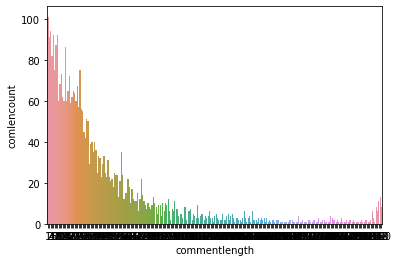

In [222]:
sns.barplot(x='commentlength', y='comlencount', data=counts)

In [227]:
comments['commentlength'].max()

3240.0

In [228]:
#min 1, max가 3240이므로 log 사용함
comments["logcomlength"]=np.log(comments["commentlength"])

In [232]:
#chid당 코멘트 갯수 세고, 코멘트 길이, 코멘트 길이 로그 가져오기
commentno =  comments.groupby('chid').agg({'comment':'count','commentlength':'sum','logcomlength':'sum'}).reset_index()

commentno 

,chid,comment,commentlength,logcomlength
0,1,74,11437.0,348.975511
1,3,7,785.0,32.447048
2,5,1,54.0,3.988984
3,6,14,1114.0,59.250809
4,7,32,1732.0,118.345717
...,...,...,...,...
3676,3901,16,2085.0,73.702210
3677,3902,27,2407.0,108.989007
3678,3903,41,2247.0,158.313414
3679,3904,1,105.0,4.653960


In [233]:
commentno.rename(columns={'comment':'comment_count'}, 
                 inplace=True)

In [234]:
#commentno와 df1_5를 merge 하기
df1_6 = df1_5.merge(commentno, on= 'chid',how='left')
df1_6 

,chid,created_date,tags,story,total_photos,total_co_photos,total_community_photos,total_comments,total_updates,campaign_hearts,...,funds_target_dollar,char_age,storylength,gensuccess,dum_gensuccess,logstorylength,update_count,comment_count,commentlength,logcomlength
0,1,2020-06-03,Funerals & Memorials,This is the official Chris Beaty GoFundMe crea...,3.0,1.0,2.0,0.0,1.0,1691.0,...,200000.0,153,1506,False,0,7.317212,1.0,74.0,11437.0,348.975511
1,2,2020-06-21,"Medical, Illness & Healing",Shortly about Saha: | It is with a heavy heart...,1.0,1.0,0.0,0.0,0.0,542.0,...,226000.0,135,5152,False,0,8.547140,0.0,NaN,NaN,NaN
2,3,2020-06-19,Education & Learning,Cost Breakdown | 100 Computers x approximately...,2.0,2.0,0.0,0.0,4.0,119.0,...,30000.0,138,6270,False,0,8.743532,4.0,7.0,785.0,32.447048
3,4,2020-01-16,Accidents & Emergencies,I was caught within 7 miles of the Taal Volcan...,1.0,1.0,0.0,0.0,0.0,1.0,...,5000.0,292,402,False,0,5.996452,0.0,NaN,NaN,NaN
4,5,2020-11-02,Community & Neighbors,I have been on the board of the Center for Fam...,1.0,1.0,0.0,0.0,0.0,17.0,...,100000.0,2,1666,False,0,7.418181,0.0,1.0,54.0,3.988984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,3901,2020-07-24,"Medical, Illness & Healing","In late June, Matt Hansen was diagnosed with a...",1.0,1.0,0.0,0.0,0.0,636.0,...,15000.0,102,1399,True,1,7.243513,0.0,16.0,2085.0,73.702210
3900,3902,2020-10-13,Funerals & Memorials,Scott Zurn was diagnosed with an aggressive fo...,1.0,1.0,0.0,0.0,0.0,348.0,...,20000.0,21,1423,True,1,7.260523,0.0,27.0,2407.0,108.989007
3901,3903,2020-08-28,"Medical, Illness & Healing","First, and foremost, let��셲 talk about Sean. S...",2.0,2.0,0.0,0.0,3.0,559.0,...,50000.0,67,3135,True,1,8.050384,3.0,41.0,2247.0,158.313414
3902,3904,2020-08-09,Funerals & Memorials,"On Monday August 3, 2020, Koorosh Yaghoubian (...",1.0,1.0,0.0,0.0,0.0,298.0,...,80000.0,86,617,False,0,6.424869,0.0,1.0,105.0,4.653960


In [235]:
df1_6.columns

Index(['chid', 'created_date', 'tags', 'story', 'total_photos',
       'total_co_photos', 'total_community_photos', 'total_comments',
       'total_updates', 'campaign_hearts', 'social_share_total',
       'funds_raised_dollar', 'funds_target_dollar', 'char_age', 'storylength',
       'gensuccess', 'dum_gensuccess', 'logstorylength', 'update_count',
       'comment_count', 'commentlength', 'logcomlength'],
      dtype='object')

In [236]:
#comment length의 합 로그하기
df1_6['logcomlength']=np.log(df1_6["commentlength"])

In [240]:
#성공여부와 아래에 있는 컬럼에 대한 logistic reg
#'social_share_total''funds_target_dollar''char_age''logstorylength''total_photos'update_count comment_count logcomlength 'campaign_hearts'
res_success=logit('dum_gensuccess ~social_share_total +char_age +logstorylength+total_photos+update_count +comment_count+logcomlength+campaign_hearts',df1_6).fit()
res_success.summary()

Optimization terminated successfully.
         Current function value: 0.662481
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         dum_gensuccess   No. Observations:                 3660
Model:                          Logit   Df Residuals:                     3651
Method:                           MLE   Df Model:                            8
Date:                Sat, 28 Nov 2020   Pseudo R-squ.:                 0.01999
Time:                        21:00:49   Log-Likelihood:                -2424.7
converged:                       True   LL-Null:                       -2474.1
Covariance Type:            nonrobust   LLR p-value:                 7.168e-18
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5514      0.414      1.332      0.183      -0.260       1.363
social_share_total -1.044e-06   6.75e-06     -0.155      0.877   -1.43e-05    1.22e-05
char_age           -7.623e-05      0.000     -0.207      0.836      -0.001       0.001
logstorylength        -0.2991      0.044     -6.766      0.000      -0.386      -0.212
total_photos          -0.0027      0.004     -0.768      0.443      -0.010       0.004
update_count          -0.0221      0.009     -2.518      0.012      -0.039      -0.005
comment_count         -0.0007      0.001     -0.718      0.473      -0.003       0.001
logcomlength           0.1793      0.037      4.808      0.000       0.106       0.252
campaign_hearts     4.409e-06   1.83e-05      0.241      0.809   -3.14e-05    4.02e-05
======================================================================================
"""

In [241]:
train_df1_6, test_df1_6 = train_test_split(df1_6, test_size=0.2, random_state=1234)

In [242]:
a = logit('dum_gensuccess ~social_share_total +char_age +logstorylength+total_photos+update_count +comment_count+logcomlength+campaign_hearts', train_df1_6).fit()
a.summary()

Optimization terminated successfully.
         Current function value: 0.662064
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         dum_gensuccess   No. Observations:                 2935
Model:                          Logit   Df Residuals:                     2926
Method:                           MLE   Df Model:                            8
Date:                Sat, 28 Nov 2020   Pseudo R-squ.:                 0.02233
Time:                        21:05:00   Log-Likelihood:                -1943.2
converged:                       True   LL-Null:                       -1987.5
Covariance Type:            nonrobust   LLR p-value:                 8.287e-16
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.8080      0.468      1.726      0.084      -0.110       1.726
social_share_total -6.162e-06   7.56e-06     -0.815      0.415    -2.1e-05    8.66e-06
char_age            7.506e-05      0.000      0.182      0.855      -0.001       0.001
logstorylength        -0.3396      0.050     -6.803      0.000      -0.437      -0.242
total_photos          -0.0053      0.004     -1.238      0.216      -0.014       0.003
update_count          -0.0155      0.010     -1.550      0.121      -0.035       0.004
comment_count         -0.0007      0.001     -0.626      0.532      -0.003       0.001
logcomlength           0.1828      0.042      4.323      0.000       0.100       0.266
campaign_hearts      4.11e-06   2.14e-05      0.192      0.848   -3.79e-05    4.61e-05
======================================================================================
"""

In [243]:
a_prob = a.predict(test_df1_6)
a_prediction = np.where(a_prob>0.5,1,0)

In [244]:
confusion_matrix(test_df1_6['dum_gensuccess'], a_prediction)

array([[432,  47],
       [248,  54]], dtype=int64)

In [246]:
#accuracy
(432+54)/(432+47+248+54) * 100

62.22791293213829